In [39]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [40]:
"""we are using a reservoir water levels to stimulate a water body where flooding is possible"""

'we are using a reservoir water levels to stimulate a water body where flooding is possible'

In [41]:
df = pd.read_csv('C:\\Users\\hp\\Downloads\\ibm\\current-reservoir-levels.csv')

In [42]:
df

,Date,Ashokan East Storage,Ashokan East Elevation,Ashokan West Storage,Ashokan West Elevation,Schoharie Storage,Schoharie Elevation,Rondout Storage,Rondout Elevation,Neversink Storage,Neversink Elevation,Pepacton Storage,Pepacton Elevation,Cannonsville Storage,Cannonsville Elevation
0,1509523200,65.36,577.86,36.34,577.89,12.92,1109.86,47.26,835.85,30.74,1430.03,116.60,1264.45,47.69,1112.87
1,1509609600,64.95,577.58,36.82,578.59,13.28,1111.05,47.32,835.94,30.68,1429.90,116.87,1264.61,48.20,1113.33
2,1509696000,64.36,577.31,37.18,579.14,13.56,1111.97,47.22,835.79,30.72,1429.99,117.08,1264.74,48.66,1113.74
3,1509782400,63.71,576.94,37.49,579.56,13.78,1112.73,47.28,835.88,30.83,1430.22,117.15,1264.78,49.05,1114.09
4,1509868800,63.15,576.52,37.78,579.92,13.98,1113.39,47.36,836.00,30.94,1430.47,117.11,1264.76,49.35,1114.36
5,1509955200,62.53,576.14,38.04,580.24,14.19,1114.04,47.46,836.14,31.07,1430.75,117.23,1264.83,49.75,1114.72
6,1510041600,61.92,575.75,38.28,580.52,14.38,1114.66,47.50,836.21,31.19,1431.01,117.20,1264.81,50.13,1115.06
7,1510128000,61.32,575.35,38.49,580.78,14.55,1115.20,47.56,836.29,31.26,1431.16,116.96,1264.67,50.44,1115.33
8,1510214400,60.76,574.96,38.71,581.00,14.71,1115.69,47.46,836.15,31.37,1431.37,116.78,1264.56,50.68,1115.55
9,1510300800,60.13,574.55,38.85,581.22,14.84,1116.13,47.53,836.25,31.24,1431.10,116.70,1264.51,50.94,1115.76


In [43]:
list(df)

['Date              ',
 'Ashokan East Storage',
 'Ashokan East Elevation',
 'Ashokan West Storage',
 'Ashokan West Elevation',
 'Schoharie Storage',
 'Schoharie Elevation',
 'Rondout Storage',
 'Rondout Elevation',
 'Neversink Storage',
 'Neversink Elevation',
 'Pepacton Storage',
 'Pepacton Elevation',
 'Cannonsville Storage',
 'Cannonsville Elevation']

In [44]:
"""making a dataframe using required columns and renaming then for convenience
   subtracting 2 consecutive values of elevation to get the state column"""

'making a dataframe using required columns and renaming then for convenience\n   subtracting 2 consecutive values of elevation to get the state column'

In [45]:
n=df['Ashokan East Elevation']
n2=[]
for x in range(0,len(df['Ashokan East Elevation'])-1):
    c=(df['Ashokan East Elevation'][x+1]-df['Ashokan East Elevation'][x])
    n2.append(c)
n2.append(df['Ashokan East Elevation'][len(df['Ashokan East Elevation'])-1]-df['Ashokan East Elevation'][len(df['Ashokan East Elevation'])-2])
df=pd.DataFrame({'Acc':n,'State':n2})
print (df)

         Acc  State
0     577.86  -0.28
1     577.58  -0.27
2     577.31  -0.37
3     576.94  -0.42
4     576.52  -0.38
5     576.14  -0.39
6     575.75  -0.40
7     575.35  -0.39
8     574.96  -0.41
9     574.55  -0.41
10    574.14  -0.42
11    573.72  -0.29
12    573.43  -0.07
13    573.36  -0.11
14    573.25  -0.29
15    572.96  -0.35
16    572.61  -0.32
17    572.29  -0.28
18    572.01  -0.34
19    571.67  -0.34
20    571.33  -0.36
21    570.97  -0.35
22    570.62  -0.37
23    570.25  -0.34
24    569.91  -0.34
25    569.57  -0.39
26    569.18  -0.04
27    569.14   0.01
28    569.15  -0.08
29    569.07  18.66
...      ...    ...
4521  586.60  -0.02
4522  586.58   0.00
4523  586.58  -0.02
4524  586.56  -0.01
4525  586.55  -0.03
4526  586.52  -0.01
4527  586.51  -0.03
4528  586.48   0.00
4529  586.48  -0.03
4530  586.45  -0.02
4531  586.43  -0.03
4532  586.40  -0.08
4533  586.32   0.05
4534  586.37   0.00
4535  586.37  -0.02
4536  586.35   0.04
4537  586.39  -0.04
4538  586.35  -0.01


In [46]:
"""making 5 columns each out of existing 2 columns"""

'making 5 columns each out of existing 2 columns'

In [47]:
for i in range(1, 5):
    df['Acc_{}'.format(i)] = df.Acc.shift(i)
    df['State_{}'.format(i)] = df.State.shift(i)    
df = df.dropna() 

In [48]:
(df)  

,Acc,State,Acc_1,State_1,Acc_2,State_2,Acc_3,State_3,Acc_4,State_4
4,576.52,-0.38,576.94,-0.42,577.31,-0.37,577.58,-0.27,577.86,-0.28
5,576.14,-0.39,576.52,-0.38,576.94,-0.42,577.31,-0.37,577.58,-0.27
6,575.75,-0.40,576.14,-0.39,576.52,-0.38,576.94,-0.42,577.31,-0.37
7,575.35,-0.39,575.75,-0.40,576.14,-0.39,576.52,-0.38,576.94,-0.42
8,574.96,-0.41,575.35,-0.39,575.75,-0.40,576.14,-0.39,576.52,-0.38
9,574.55,-0.41,574.96,-0.41,575.35,-0.39,575.75,-0.40,576.14,-0.39
10,574.14,-0.42,574.55,-0.41,574.96,-0.41,575.35,-0.39,575.75,-0.40
11,573.72,-0.29,574.14,-0.42,574.55,-0.41,574.96,-0.41,575.35,-0.39
12,573.43,-0.07,573.72,-0.29,574.14,-0.42,574.55,-0.41,574.96,-0.41
13,573.36,-0.11,573.43,-0.07,573.72,-0.29,574.14,-0.42,574.55,-0.41


In [49]:
df.drop('State_1', axis=1, inplace=True)
df.drop('State', axis=1, inplace=True)
df.drop('State_2', axis=1, inplace=True)
df.drop('State_3', axis=1, inplace=True)
df.drop('State_4', axis=1, inplace=True)


In [50]:
df

,Acc,Acc_1,Acc_2,Acc_3,Acc_4
4,576.52,576.94,577.31,577.58,577.86
5,576.14,576.52,576.94,577.31,577.58
6,575.75,576.14,576.52,576.94,577.31
7,575.35,575.75,576.14,576.52,576.94
8,574.96,575.35,575.75,576.14,576.52
9,574.55,574.96,575.35,575.75,576.14
10,574.14,574.55,574.96,575.35,575.75
11,573.72,574.14,574.55,574.96,575.35
12,573.43,573.72,574.14,574.55,574.96
13,573.36,573.43,573.72,574.14,574.55


In [51]:
df['diff_1'] = np.abs(df.Acc - df.Acc_1)
df['diff_2'] = np.abs(df.Acc_1 - df.Acc_2)
df['diff_3'] = np.abs(df.Acc_2 - df.Acc_3)
df['diff_4'] = np.abs(df.Acc_3 - df.Acc_4)

In [52]:
df

,Acc,Acc_1,Acc_2,Acc_3,Acc_4,diff_1,diff_2,diff_3,diff_4
4,576.52,576.94,577.31,577.58,577.86,0.42,0.37,0.27,0.28
5,576.14,576.52,576.94,577.31,577.58,0.38,0.42,0.37,0.27
6,575.75,576.14,576.52,576.94,577.31,0.39,0.38,0.42,0.37
7,575.35,575.75,576.14,576.52,576.94,0.40,0.39,0.38,0.42
8,574.96,575.35,575.75,576.14,576.52,0.39,0.40,0.39,0.38
9,574.55,574.96,575.35,575.75,576.14,0.41,0.39,0.40,0.39
10,574.14,574.55,574.96,575.35,575.75,0.41,0.41,0.39,0.40
11,573.72,574.14,574.55,574.96,575.35,0.42,0.41,0.41,0.39
12,573.43,573.72,574.14,574.55,574.96,0.29,0.42,0.41,0.41
13,573.36,573.43,573.72,574.14,574.55,0.07,0.29,0.42,0.41


In [ ]:
"""creating target column... 1:anomaly detected 2:no anomaly detected"""

In [53]:
tg=[]
for x in range(4,4551):
    try:
        if (df['diff_1'][x] > 5) or (df['diff_2'][x] > 5) or (df['diff_3'][x] > 5) or (df['diff_4'][x] >5):
            tg.append(1)    
        else:
            tg.append(0)
    except:
        continue

In [ ]:
"""making a new dataframe containg the data of all the anomalies detected"""

In [54]:
df["Target"] =tg
plot_df = df[0:4551]
df_anomalies = plot_df[plot_df['Target']==1]
print ((df_anomalies))

         Acc   Acc_1   Acc_2   Acc_3   Acc_4  diff_1  diff_2  diff_3  diff_4  \
30    587.73  569.07  569.15  569.14  569.18   18.66    0.08    0.01    0.04   
31    587.72  587.73  569.07  569.15  569.14    0.01   18.66    0.08    0.01   
32    587.75  587.72  587.73  569.07  569.15    0.03    0.01   18.66    0.08   
33    587.67  587.75  587.72  587.73  569.07    0.08    0.03    0.01   18.66   
61    582.43  587.58  587.64  587.62  587.60    5.15    0.06    0.02    0.02   
62    586.98  582.43  587.58  587.64  587.62    4.55    5.15    0.06    0.02   
63    587.81  586.98  582.43  587.58  587.64    0.83    4.55    5.15    0.06   
64    587.94  587.81  586.98  582.43  587.58    0.13    0.83    4.55    5.15   
1763  560.72  567.95  567.96  568.04  569.77    7.23    0.01    0.08    1.73   
1764  568.03  560.72  567.95  567.96  568.04    7.31    7.23    0.01    0.08   
1765  567.84  568.03  560.72  567.95  567.96    0.19    7.31    7.23    0.01   
1766  567.98  567.84  568.03  560.72  56

In [ ]:
"""plotting the anomalies on elevation vs index graph (red dots represent anomaly)"""

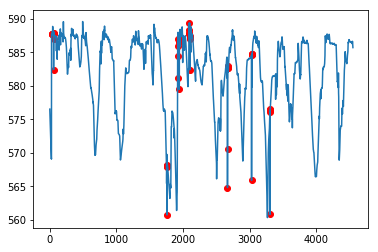

In [55]:
plt.plot(plot_df['Acc'])
plt.scatter(df_anomalies.index, df_anomalies.Acc, color='r')

In [ ]:
"""saving the data on an excel sheet for future use by concerned authorities"""

In [56]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [57]:
writer = ExcelWriter('Processed3.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()